In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Data Exploration and Visualization

In [3]:
#Testdata
loaderT1 = np.load('./CompetitionData1/Round1TestData1.npy')
loaderT2 = np.load('./CompetitionData1/Round1TestData2.npy')
loaderT3 = np.load('./CompetitionData1/Round1TestData3.npy')

#TrainData
loaderTr1 = np.load('./CompetitionData1/Round1TrainData1.npy')
loaderTr2 = np.load('./CompetitionData1/Round1TrainData2.npy')
loaderTr3 = np.load('./CompetitionData1/Round1TrainData3.npy')

#Label
loaderLabel1 = np.load('./CompetitionData1/Round1TrainLabel1.npy')
loaderLabel2 = np.load('./CompetitionData1/Round1TrainLabel2.npy')
loaderLabel3 = np.load('./CompetitionData1/Round1TrainLabel3.npy')

In [5]:
print("Shape:", loaderTr1.shape)
print("Number of dimensions:", loaderTr1.ndim)
print("Total elements:", loaderTr1.size)

print("Shape:", loaderT1.shape)
print("Number of dimensions:", loaderT1.ndim)
print("Total elements:", loaderT1.size)

Shape: (20000, 64, 64, 2)
Number of dimensions: 4
Total elements: 163840000
Shape: (1000, 64, 64, 2)
Number of dimensions: 4
Total elements: 8192000


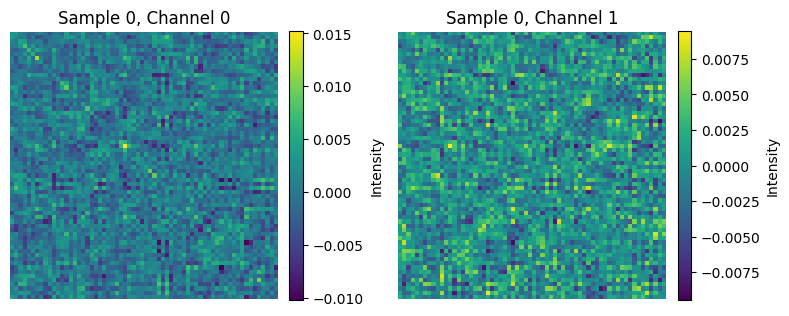

In [16]:
noise_data = loaderTr1 - loaderLabel1

def plot_data(x, sample=0):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    im0 = axes[0].imshow(x[sample, :, :, 0], cmap='viridis')
    axes[0].set_title(f"Sample {sample}, Channel 0")
    axes[0].axis("off")
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04, label="Intensity")

    im1 = axes[1].imshow(x[sample, :, :, 1], cmap='viridis')
    axes[1].set_title(f"Sample {sample}, Channel 1")
    axes[1].axis("off")
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04, label="Intensity")

    plt.tight_layout()
    plt.show()

plot_data(noise_data, sample=0)

C:\Users\yushe\AppData\Local\Temp\ipykernel_14928\3529116412.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


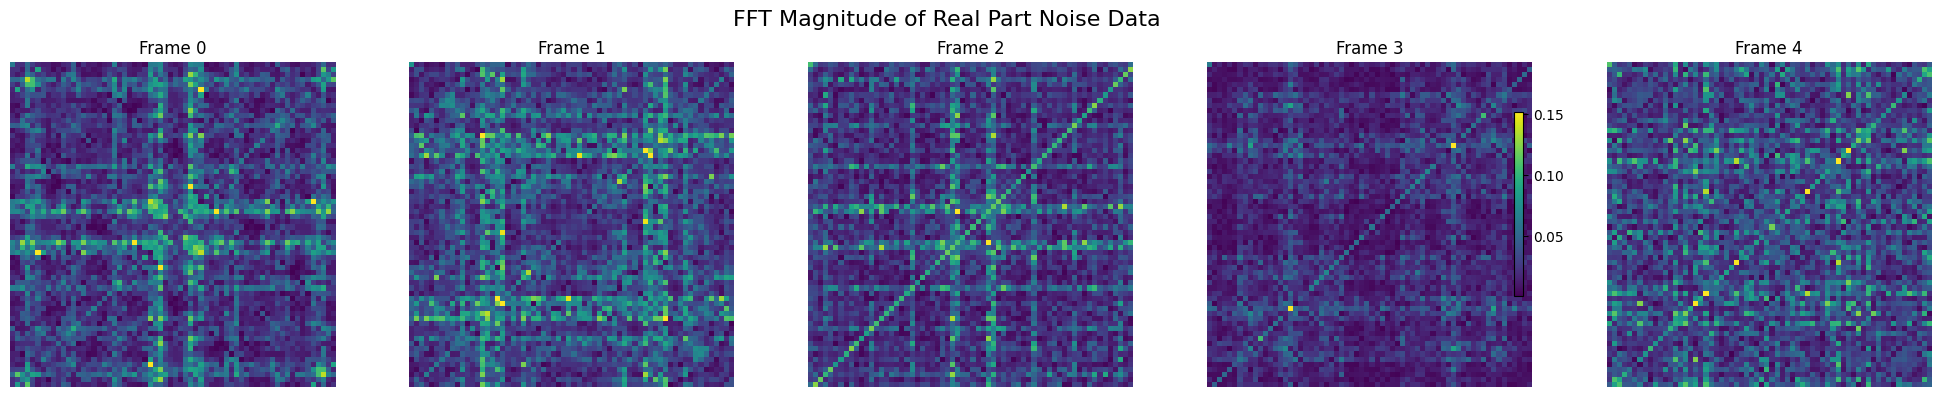

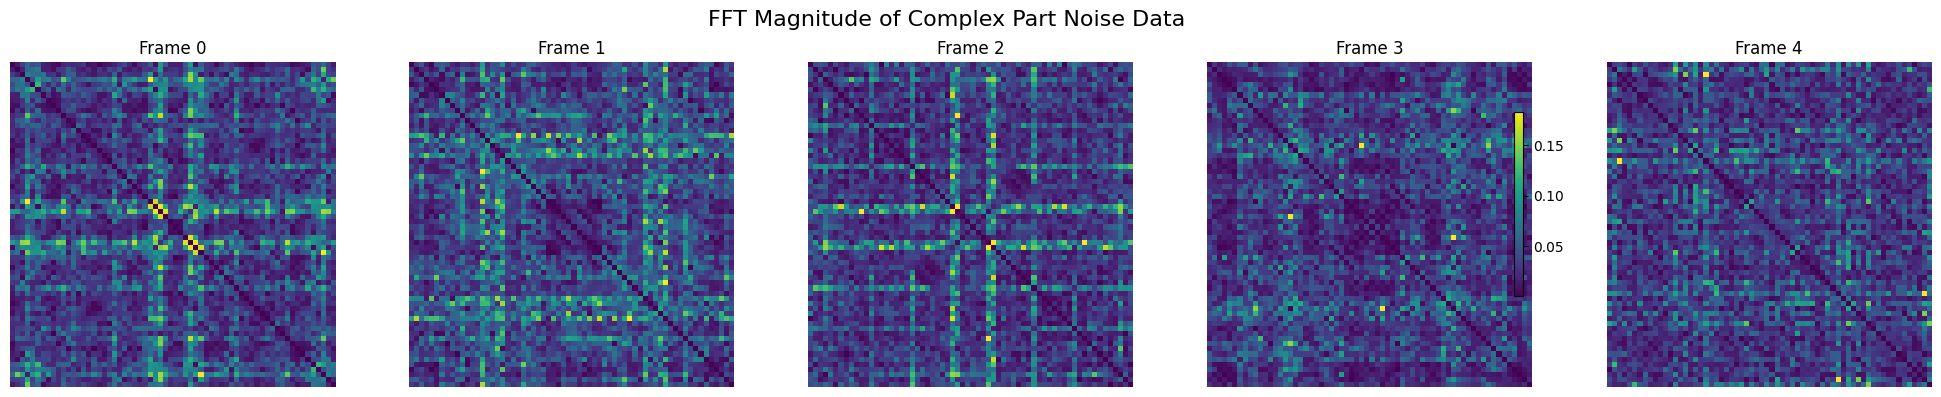

In [15]:
from numpy.fft import fft2, fftshift

def plot_fft(noise_data, custom_title="FFT Magnitude of Noise Data"):
    fft_results = np.fft.fft2(noise_data, axes=(1, 2))
    fft_magnitude = np.abs(np.fft.fftshift(fft_results, axes=(1, 2)))
    log_magnitude = np.log1p(fft_magnitude)
    N = min(5, noise_data.shape[0])

    fig, axes = plt.subplots(1, N, figsize=(4 * N, 4))

    for i in range(N):
        ax = axes[i] if N > 1 else axes  # handle case when N = 1
        im = ax.imshow(log_magnitude[i], cmap='viridis')
        ax.set_title(f"Frame {i}")
        ax.axis('off')

    fig.suptitle(custom_title, fontsize=16)
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

plot_fft(noise_data[:, :, :, 0], custom_title="FFT Magnitude of Real Part Noise Data")
plot_fft(noise_data[:, :, :, 1], custom_title="FFT Magnitude of Complex Part Noise Data")

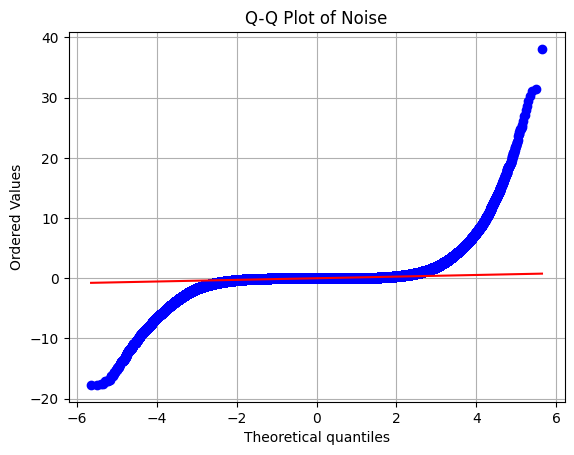

In [18]:
import scipy.stats as stats

stats.probplot(noise_data[:, :, :, 0].flatten(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Noise")
plt.grid(True)
plt.show()

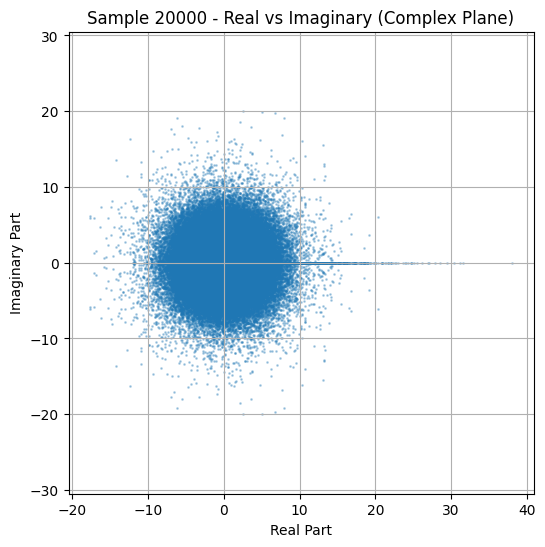

In [24]:
def plot_scatter_noise(noise_data, sample=0):
    real = noise_data[:, :, :, 0].flatten()
    imag = noise_data[:, :, :, 1].flatten()

    plt.figure(figsize=(6, 6))
    plt.scatter(real, imag, alpha=0.3, s=1)
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title(f"Sample {sample} - Real vs Imaginary (Complex Plane)")
    plt.axis("equal")
    plt.grid(True)
    plt.show()
plot_scatter_noise(noise_data, sample=20000)